<h1><center> A Gentle Introduction to Machine Learning: </center></h1>
<h1><center> Basics of Linear Regression</center></h1>

<div style="text-align: left"> **Speaker:** *Elie Kawerk* </div>

*Lebanon Artificial Intelligence Meetup*
 
<div style="text-align: left"> *$27^{th}$ of April 2017* </div>

## Hands on session

In this hands-on session we will implement some of the algorithms that were presented during the talk. Let us start by importing the libraries of interest.

In [1]:
%matplotlib inline
# Plotting in notebook
import numpy as np # Linear algebra
import seaborn as sns # Styling our plots
import matplotlib.pyplot as plt # Plotting interface
#from sklearn.preprocessing import  PolynomialFeatures

For illustration purposes, we will be dealing with a toy dataset defined as following:

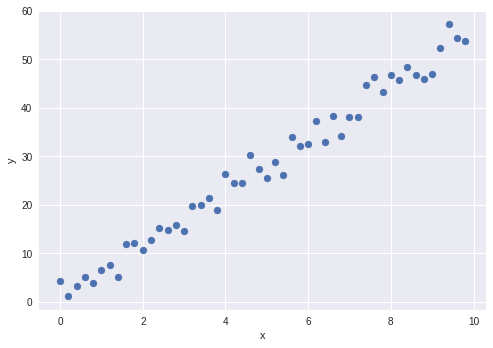

In [2]:
#set the seed to obtain reproducible results
np.random.seed(7)
x = np.arange(0,10,0.2)
y = 5.5 * x  + 1 + 2* np.random.randn(x.shape[0])
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

###  1. Implementing the hypothesis

The hypothesis of simple linear regression (one-dimensional feature vector) is given by: 

$$ h_{\theta}(x) = \theta_0 + \theta_1 x =  \theta_0 \underbrace{x_0}_{= 1} + \theta_1 \underbrace{x_1}_{= x} $$

By setting **$\theta=$** $ \begin{bmatrix} \theta_0 \\ \theta_1 \end{bmatrix}$ and  $X = \begin{bmatrix}x_0 \\ x_1 \end{bmatrix} $ with $x_0 = 1$ (bias) and $x_1 = x$, the hypothesis can then be expressed in the following form:

$$ h_{\theta}(x) = \theta^{T}X  $$


This is expression is correct for one observation. However, if we have a feature matrix of N rows in which each row presents an observation, the feature vector $X$ is written as follows:

$$
X = \begin{bmatrix}
x_0^{(1)} & x_1^{(1)} \\
x_0^{(2)} & x_1^{(2)} \\
\vdots & \vdots\\
x_0^{(N)} & x_1^{(N)} 
\end{bmatrix}\hspace{3cm}
y = \begin{bmatrix}
y^{(1)}\\
y^{(2)}\\
\vdots\\
y^{(N)}
\end{bmatrix}
$$

then, the predicted value for each observation can be written as: 

$$\hat y^{(i)} = h_{\theta}(x^{(i)}) = \theta^T x^{(i)} $$

Or, using the matrix form, we can write:

$$\underbrace{\hat y}_{\begin{bmatrix}\hat y^{(1)}\\ \vdots \\ \hat y^{(N)} \end{bmatrix}} =h_{\theta}(X) = X \theta$$

Simple matrix arithmetic tells us that if $X \in \mathbb{R}^{(N, D+1)}$ and $\theta \in \mathbb{R}^{(D+1,1)} $ then we must obtain $\hat y \in \mathbb{R}^{(N,1)}$. 

Let's begin by adding a column of ones (bias unit) to the feature vector x.

In [3]:
def add_bias(X):
    # transform the row vector into a column vector
    X = X.reshape(-1,1)
    # add a column of ones
    ones = np.ones((X.shape[0],1))
    return np.hstack([ones,X])

X = add_bias(x)
print(X[:5])

[[ 1.   0. ]
 [ 1.   0.2]
 [ 1.   0.4]
 [ 1.   0.6]
 [ 1.   0.8]]


**Write a python function called *hypothesis* that takes the vectors X and $\theta$ as parameters (inputs) and returns an array of the predicted values $\hat y $. You can use either a for loop or a vectorized numpy operation. For your convenience, the function's template is provided below.**

In [4]:
def hypothesis(X, theta):
    return X.dot(theta)

theta = np.array([2.0,2.0])
y_hat = hypothesis(X, theta)
print(len(y), len(y_hat))

50 50


### 2. Computing the Cost Function

The cost function for linear regression is the mean squared error defined as follows:

$$J(\theta) = \dfrac{1}{2N} \sum_{i=1}^{N}{\Big ( y^{(i)}-h_{\theta}(x^{(i)}) \Big ) ^2}$$

We can also write $J(\theta)$ in matrix form:

$$J(\theta) = \dfrac{1}{2N} \Big \lVert y- h_{\theta}(X) \Big \lVert ^2
=\dfrac{1}{2N} \Big( y- h_{\theta}(X) \Big )^T \Big( y- h_{\theta}(X) \Big ) $$

**Write a python function called *compute_cost* that takes X, $\theta$ and y as parameters (inputs) and returns the cost function. You can use either a for loop or a vectorized numpy operation. For your convenience, the function's template is provided below.**

In [6]:
def compute_cost(X,y, theta):
    N = len(y)
    error = y - hypothesis(X, theta)
    #return 1/(2*N) * np.dot(error.T, error)
    return 1/(2*N) * error.T.dot(error)

print(compute_cost(X,y,theta))

179.977637569


### 3. Computing the Cost Derivative

Let's compute the derivative of the cost function. For a regression model in $D$ dimensions (here $D = 1$ for simple linear regression), the derivative is a $D + 1$ dimensional vector:

$$\dfrac{\partial J(\theta)}{\partial \theta} = \begin{bmatrix} \dfrac{\partial J(\theta)}{\partial \theta_0} \\ \vdots \\ \dfrac{\partial J(\theta)}{\partial \theta_D} \end{bmatrix}$$
with:
$$\dfrac{\partial J(\theta)}{\partial \theta_k}= \dfrac{\partial \Big ( \dfrac{1}{2N} \sum_{i=1}^{N}{\Big ( y^{(i)}-h_{\theta}(x^{(i)}) \Big ) ^2} \Big )}{\partial \theta_k}= \dfrac{2}{2N} \sum_{i=1}^{N}{\Big ( y^{(i)}-h_{\theta}(x^{(i)}) \Big )\Big(- \dfrac{\partial h_{\theta}(x^{(i)})}{\partial \theta_k} \Big)}$$

Using $\dfrac{\partial h_{\theta}(x^{(i)})}{\partial \theta_k} = x_k^{(i)}$, we get:

$$\dfrac{\partial J(\theta)}{\partial \theta_k}= - \dfrac{1}{N} \sum_{i=1}^{N}{\Big ( y^{(i)}-h_{\theta}(x^{(i)}) \Big ) x_k^{(i)} } \hspace{2cm} k= 0, \dots, D$$

In matrix form, the derivative ($D+1$ dimensional vector) can be written as follows:

$$\dfrac{\partial J(\theta)}{\partial \theta} = - \dfrac{1}{N}\hspace{2mm}X^T\Big( y - h_{\theta}(X) \Big)$$


**Write a python function called *compute_cost_derivative* that takes X, $\theta$ and y as parameters (inputs) and returns the derivative of the cost function. You can use either a for loop or a vectorized numpy operation. For your convenience, the function's template is provided below.**

In [7]:
def compute_cost_derivative(X,y, theta):
    N = len(y)
    return (-1/N) * (X.T).dot(y- hypothesis(X,theta))

compute_cost_derivative(X,y, theta)

array([ -15.96322079, -107.14261329])

Equivalently the derivative of the cost function can be numerically approximated by central difference:


$$\dfrac{\partial J(\theta)}{\partial \theta_k} \approx \dfrac{J(\theta_k + \epsilon)- J(\theta_k - \epsilon)}{2 \epsilon} $$

with $\epsilon$ being a very small number.

Let's examine if the function we have written outputs close values to ones obtained using numerical differentiation.

In [8]:
def numerical_cost_derivative(X,y, theta, eps=10**(-6)):
    deriv = np.zeros(theta.shape)
    for j in range(len(deriv)):
        eps_vec = np.zeros(theta.shape)
        eps_vec[j] = eps
        deriv[j] =\
        (compute_cost(X,y, theta + eps_vec)- compute_cost(X,y, theta - eps_vec))/(2*eps)
    return deriv

numerical_derivative = numerical_cost_derivative(X,y, theta)
analytical_derivative = compute_cost_derivative(X,y, theta)
print("Numerical derivative:", numerical_derivative)
print("Analytical derivative:", analytical_derivative)
is_derivative_correct = np.abs(numerical_derivative - analytical_derivative) < 10**(-4)
if np.all(is_derivative_correct):
    print("Numerical and analytical derivatives match") 

Numerical derivative: [ -15.96322079 -107.1426133 ]
Analytical derivative: [ -15.96322079 -107.14261329]
Numerical and analytical derivatives match


It should be noted that numerical differentiation is computationally expensive and is done here only for debugging purposes.

###  4. Minimization with gradient descent

Gradient descent is an optimization algorithm used to minimize the cost function by descending along the tangeant to the cost function repeatedly until finding the local minimum. We first pick a value of $\theta$ and then update this value for a certain number of epochs until convergence using the following equation:

$$\theta_j :=   \theta_j - \underbrace{\alpha}_{\text{learning rate}}\dfrac{\partial J(\theta)}{\partial \theta_j}$$

We can also write the equation in vector form:

$$ \theta := \theta - \alpha\dfrac{\partial J(\theta)}{\partial \theta}$$

Care should be taken when chossing the learning rate $\alpha$. A small value of $\alpha$ would lead to a slow convergence. A great value of $\alpha$ may lead to overshooting the minimum; the gradient descent algorithm would then have a hard time converging.

**Write a python function called *update_theta* that takes X, y, $\theta$ and alpha as parameters (inputs) and returns the updated value of theta. You can use either a for loop or a vectorized numpy operation. For your convenience, the function's template is provided below.**

In [9]:
def update_theta(X,y,theta,alpha):
        return theta - alpha * compute_cost_derivative(X,y,theta) 
    
update_theta(X,y,theta, alpha=0.001)

array([ 2.01596322,  2.10714261])

### 5. Tying everything together

Let's tie everything together. 

**Write a python function called *optimize_cost* that takes X, y, $\alpha$ (the learning rate) and the number of epochs *n_epochs* as parameters (inputs) and returns the optimal $\theta$ value. For your convenience, the function's template is provided below.**

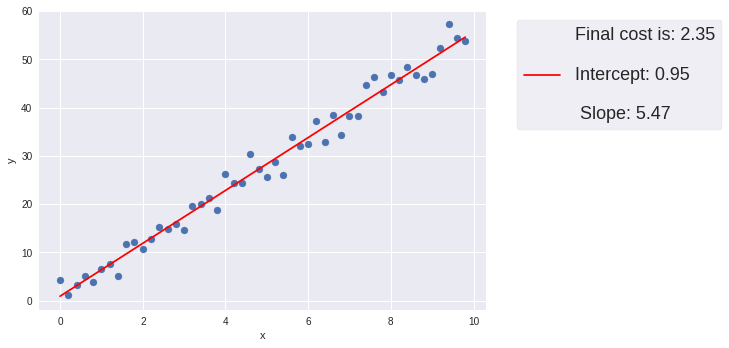

In [10]:
def optimize_cost(X, y, alpha=0.05, n_epochs=400):
    #intialize theta
    theta = np.zeros(X.shape[1]) 
    #np.random.seed(3)
    #theta = np.random.randn(X.shape[1])
    #repeat gradient descent for n_epochs
    for epoch in range(n_epochs):        
        theta = update_theta(X,y, theta, alpha)
    return theta

theta_optimal = optimize_cost(X,y)
y_pred = hypothesis(X,theta_optimal)
final_cost = compute_cost(X,y, theta_optimal)

plt.scatter(x,y)
plt.plot(x,y_pred, color='red', label = r"Final cost is: " + 
         str(round(final_cost,2)) + '\n \n' 
         + "Intercept: " + str(round(theta_optimal[0],2))+ 
         "\n \n Slope: " + str(round(theta_optimal[1],2)))
plt.legend(frameon=True, fontsize='18', bbox_to_anchor=(1.05,1))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### 6. Understanding the behavior of the Cost function in gradient descent

Plot the cost function as a function of the number of iterations using the same algorithm *optimize_cost* but instead of returning $\theta_{optimal}$, return the vector of costs.

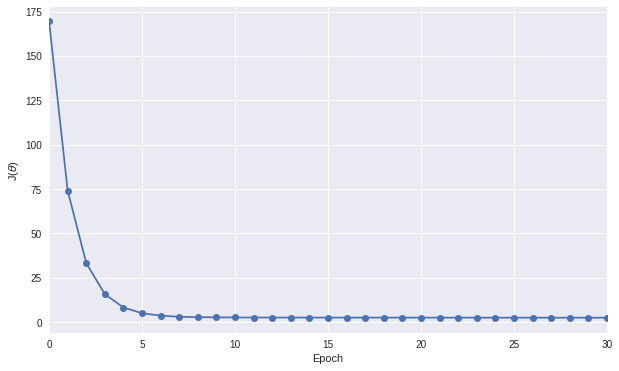

In [11]:
def get_cost(X, y, alpha=0.05, n_epochs=400):
    #intialize theta
    #theta = np.zeros(X.shape[1]) 
    np.random.seed(3)
    theta = np.random.randn(X.shape[1])
    costs = []
    #repeat gradient descent for n_epochs
    for epoch in range(n_epochs):        
        theta = update_theta(X,y, theta, alpha)
        # Harness the cost
        costs.append(compute_cost(X,y,theta))
    return costs

all_costs = get_cost(X,y)

plt.figure(figsize=(10,6))
plt.plot(all_costs, marker='o')
plt.xlim(0,30)
plt.xlabel('Epoch')
plt.ylabel(r'J($\theta$)')
plt.show()

The cost function must decrease with time otherwise your implementation is wrong!

### 7. Using the Scikit-learn API

Let's start by importing linear regression from sklearn.

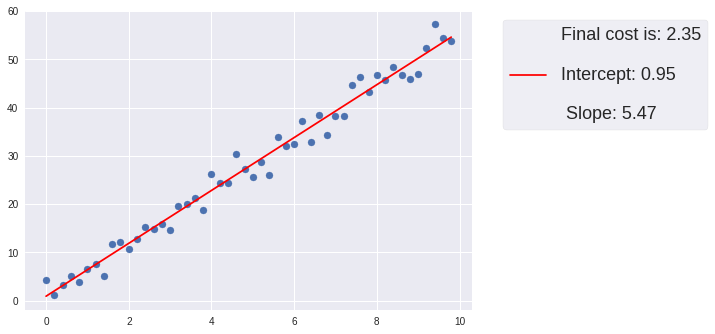

In [12]:
from sklearn.linear_model import LinearRegression

#reshape x to feed it into sklearn
x_skl = x.reshape(-1,1)
# instantiate the linear regression model
lr = LinearRegression()
# fit the model
lr.fit(x_skl,y)
# obtain the predicted values
y_pred_sklearn = lr.predict(x_skl)
#compute cost
skl_cost = np.mean(0.5*(y-y_pred_sklearn)**2)

plt.scatter(x,y)
plt.plot(x,y_pred_sklearn, color='red',label = "Final cost is: " +
         str(round(skl_cost,2)) + '\n \n' 
         + "Intercept: " + str(round(lr.intercept_,2))+ 
         "\n \n Slope: " + str(round(lr.coef_[0],2)))
plt.legend(frameon=True, fontsize='18', bbox_to_anchor=(1.05,1))
plt.show()

### 7. Where to go next

Congratulations, you made it! Take a moment to reflect on what you learned. Here's a list of resources (that I found useful) to learn the practical aspects of machine learning basics:

<ul>
<li> Machine Learning MOOC by Andrew Ng, Stanford university, Coursera (https://www.coursera.org/learn/machine-learning)
<li> Machine Learning Mastery Blog (http://machinelearningmastery.com/)
<li> Python Machine Learning by Sebastian Raschka, Packt Publishing (https://www.packtpub.com/big-data-and-business-intelligence/python-machine-learning)
<li> Python for Data Science and Machine Learning Bootcamp by Jose Portilla, Udemy (https://www.udemy.com/python-for-data-science-and-machine-learning-bootcamp/)
</ul>

# Thank you so much for attending this meetup!